# Homework 4

## 1 Setting up the data

### 1.

In [2]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
np.random.seed(7)
# Data Loading
X = np.genfromtxt('HW4-data/X_train.txt', delimiter=None)
Y = np.genfromtxt('HW4-data/Y_train.txt', delimiter=None) 
X,Y = ml.shuffleData(X,Y)
print('FeatureMin : ',np.min(X,axis=0),'\n ')
print('FeatureMax : ',np.max(X,axis=0),'\n ')
print('FeatureMean : ',np.mean(X,axis=0),'\n ')
print('FeatureVariance : ',np.var(X,axis=0))

FeatureMin :  [ 1.9350e+02  1.5250e+02  2.1425e+02  1.5250e+02  1.0000e+01  0.0000e+00
  0.0000e+00  0.0000e+00  8.7589e-01  0.0000e+00  0.0000e+00  0.0000e+00
  9.9049e-01 -9.9990e+02] 
 
FeatureMax :  [2.5300e+02 2.4900e+02 2.5250e+02 2.5250e+02 3.1048e+04 1.3630e+04
 9.2380e+03 1.2517e+02 1.9167e+01 1.3230e+01 6.6761e+01 7.3902e+01
 9.7504e+02 7.9720e+02] 
 
FeatureMean :  [2.41601104e+02 2.27376571e+02 2.41554150e+02 2.32826768e+02
 3.08992337e+03 9.28259020e+02 1.38093830e+02 3.24857933e+00
 6.49865290e+00 2.09713912e+00 4.21766041e+00 2.69171845e+00
 1.02715905e+01 5.78148050e+00] 
 
FeatureVariance :  [8.34991711e+01 9.26255931e+01 3.52863398e+01 9.76257317e+01
 1.56515138e+07 3.08176182e+06 4.43951746e+05 8.21948502e+00
 6.40504819e+00 4.36344047e+00 4.08637188e+00 2.19877847e+00
 4.04646245e+02 3.40652055e+03]


### 2.

In [3]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher) 
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features
print('FeatureMinTraining : ',np.min(XtS,axis=0),'\n ')
print('FeatureMaxTraining : ',np.max(XtS,axis=0),'\n ')
print('FeatureMeanTraining : ',np.mean(XtS,axis=0),'\n ')
print('FeatureVarianceTraining: ',np.var(XtS,axis=0))

FeatureMinTraining :  [ -4.68939172  -3.71311852  -4.39180524  -2.71061767  -0.79109951
  -0.53349959  -0.2121811   -1.15267265  -2.12075524  -1.01655615
  -2.11680472  -1.96363455  -0.43067124 -13.70626954] 
 
FeatureMaxTraining :  [ 1.25093768  1.94678868  1.80450477  1.98929687  7.10353042  7.04814507
 13.00389416  8.45222982  4.53465261  4.37078902  6.33527392  6.05633526
 45.72191089  6.13157387] 
 
FeatureMeanTraining :  [ 5.02833331e-15 -3.07327497e-15  1.17481402e-13 -6.84071466e-14
 -6.36379838e-17  1.69686487e-16  3.22764038e-16  2.94966274e-15
 -3.71125353e-15  7.69073694e-16 -1.31394895e-15  1.81715754e-15
 -1.29387612e-15 -1.00475184e-16] 
 
FeatureVarianceTraining:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
print('FeatureMinValidation : ',np.min(XvS,axis=0),'\n ')
print('FeatureMaxValidation : ',np.max(XvS,axis=0),'\n ')
print('FeatureMeanValidation : ',np.mean(XvS,axis=0),'\n ')
print('FeatureVarianceValidation ',np.var(XvS,axis=0))

FeatureMinValidation :  [ -5.17541867  -7.67505356  -4.42528976  -8.12282497  -0.79160825
  -0.53349959  -0.2121811   -1.15267265  -2.23041451  -1.01655615
  -2.11680472  -1.96363455  -0.43234392 -13.70626954] 
 
FeatureMaxValidation :  [ 1.25093768  2.25551089  1.85808     2.02379538  7.10353042  7.04814507
 13.00389416 42.69450057  4.53465261  4.31818563 13.23940786 38.55858511
 45.72191089 10.83126807] 
 
FeatureMeanValidation :  [ 0.02194404  0.03075136  0.02393235  0.0293494  -0.00566293 -0.01551557
 -0.01550453 -0.00686958 -0.02302603 -0.02324811 -0.00083371 -0.01092571
  0.00872809  0.02864687] 
 
FeatureVarianceValidation  [0.97655478 0.99076438 0.99230346 1.01073618 1.02390038 0.95819356
 0.8939146  1.05202934 0.99699839 0.98438264 1.01486649 1.13811436
 0.93484672 0.58422476]


## 2 Linear Classifiers

### 1.

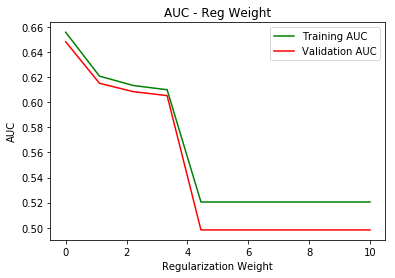

In [18]:
regs = np.linspace( 0, 10, 10 )

trAuc = []
vaAuc = []
for thereg in regs:
    learner = ml.linearC.linearClassify()
    learner.train(XtS, Yt, reg=thereg, initStep=0.5, stopTol=1e-6, stopIter=100)
    trAuc.append(learner.auc(XtS, Yt))
    vaAuc.append(learner.auc(XvS, Yva))

plt.plot(regs, trAuc, color = 'g', label = "Training AUC")
plt.legend()
plt.plot(regs, vaAuc,color = 'r', label = "Validation AUC")
plt.legend()
plt.xlabel("Regularization Weight")
plt.ylabel("AUC")
plt.title("AUC - Reg Weight")
plt.legend()
plt.show()

### 2.

In [21]:
XtrPoly = ml.transforms.fpoly(Xt, 2, bias=False)
XtrPoly,params = ml.transforms.rescale(XtrPoly)
XvaPoly,_ = ml.transforms.rescale(ml.transforms.fpoly(Xva,2,False), params)
print( XtrPoly.shape[1])

119


14original + 14degree2 + $C^{2}_{14}$ = 119

### 3.

/Users/andrezhang/Desktop/ML/hw4/mltools/base.py:96: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
/Users/andrezhang/Desktop/ML/hw4/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )


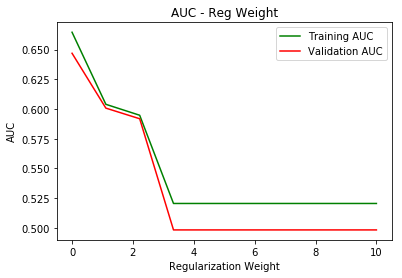

In [22]:
regs = np.linspace( 0, 10, 10 )

trPAuc = []
vaPAuc = []
for thereg in regs:
    learner = ml.linearC.linearClassify()
    learner.train(XtrPoly, Yt, reg=thereg, initStep=0.5, stopTol=1e-6, stopIter=100)
    trPAuc.append(learner.auc(XtrPoly, Yt))
    vaPAuc.append(learner.auc(XvaPoly, Yva))

plt.plot(regs, trPAuc, color = 'g', label = "Training AUC")
plt.legend()
plt.plot(regs, vaPAuc,color = 'r', label = "Validation AUC")
plt.legend()
plt.xlabel("Regularization Weight")
plt.ylabel("AUC")
plt.title("AUC - Reg Weight")
plt.legend()
plt.show()

## 3 Nearest Neighbors

### 1.

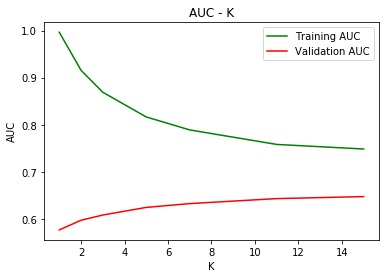

In [11]:
ks = [1,2,3,5,7,11,15]
learner = ml.knn.knnClassify()
trAuc = []
vaAuc = []
for k in ks:
    learner.train(XtS, Yt, K=k, alpha=0.0)
    trAuc.append(learner.auc(XtS, Yt))
    vaAuc.append(learner.auc(XvS, Yva))

plt.plot(ks, trAuc, color = 'g', label = "Training AUC")
plt.legend()
plt.plot(ks, vaAuc,color = 'r', label = "Validation AUC")
plt.legend()
plt.xlabel("K")
plt.ylabel("AUC")
plt.title("AUC - K")
plt.legend()
plt.show()

### 2.

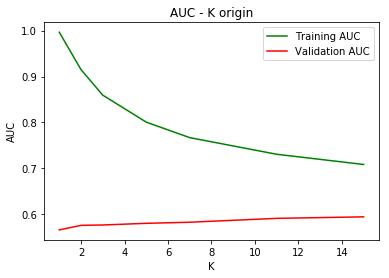

In [13]:
ks = [1,2,3,5,7,11,15]
learner = ml.knn.knnClassify()
trAuc = []
vaAuc = []
for k in ks:
    learner.train(Xt, Yt, K=k, alpha=0.0)
    trAuc.append(learner.auc(Xt, Yt))
    vaAuc.append(learner.auc(Xva, Yva))

plt.plot(ks, trAuc, color = 'g', label = "Training AUC")
plt.legend()
plt.plot(ks, vaAuc,color = 'r', label = "Validation AUC")
plt.legend()
plt.xlabel("K")
plt.ylabel("AUC")
plt.title("AUC - K origin")
plt.legend()
plt.show()

### 3.

In [112]:
K = range(1,16,2) # Or something else 
A = range(0,10,1) # Or something else 
tr_auc = np.zeros((len(K),len(A))) 
va_auc = np.zeros((len(K),len(A)))
learner = ml.knn.knnClassify()
for i,k in enumerate(K): 
    for j,a in enumerate(A):
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt)
        va_auc[i][j] = learner.auc(XvS, Yva)
# Now plot it

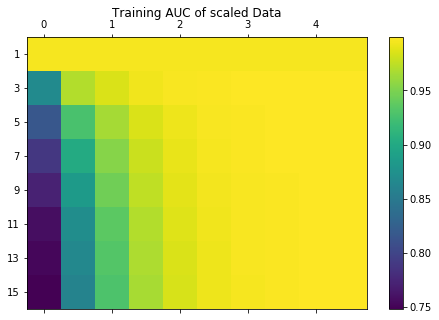

In [113]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+[0,1,2,3,4,5,6,7,8,9]) 
ax.set_yticklabels(['']+[1,3,5,7,9,11,13,15])
ax.set_title("Training AUC of scaled Data")
plt.show()

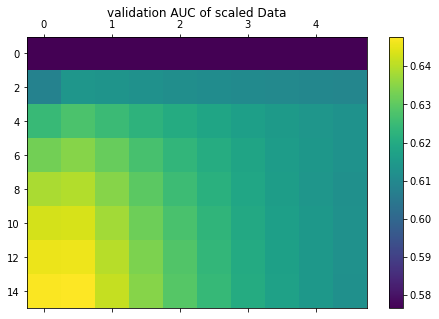

In [114]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+[0,1,2,3,4]) 
ax.set_yticklabels(['']+[0,2,4,6,8,10,12,14])
ax.set_title("validation AUC of scaled Data")
plt.show()

I recommand K  = 12 , Î± = 4

## 4 Decision Trees

### 1.

In [44]:
depth = [1,2,3,5,7,11,15]
learner = ml.dtree.treeClassify()
trAuc = []
vaAuc = []
for d in depth:
    learner.train(XtS,Yt,maxDepth=d,minParent = 2,minLeaf = 1)
    trAuc.append(learner.auc(XtS,Yt))
    vaAuc.append(learner.auc(XvS, Yva))

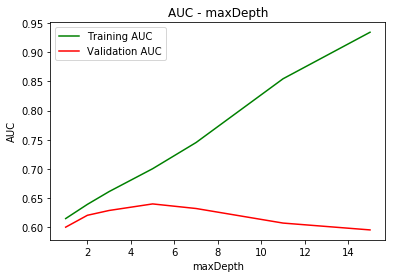

In [46]:
plt.plot(ks, trAuc, color = 'g', label = "Training AUC")
plt.legend()
plt.plot(ks, vaAuc,color = 'r', label = "Validation AUC")
plt.legend()
plt.xlabel("maxDepth")
plt.ylabel("AUC")
plt.title("AUC - maxDepth")
plt.legend()
plt.show()

### 2.

In [92]:
depth = [1,2,3,5,7,11,15]
learner = ml.dtree.treeClassify()
node1=[]
node2=[]
for  d in depth: 
    learner.train(XtS,Yt,maxDepth=d,minParent = 2,minLeaf = 1)
    node1.append(learner.sz)
    learner.train(XtS,Yt,maxDepth=d,minParent = 2,minLeaf = 3)
    node2.append(learner.sz)

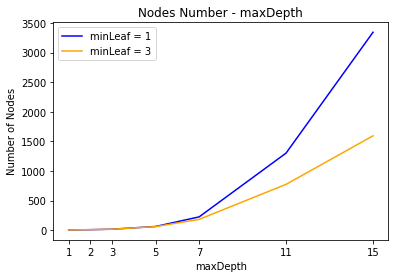

In [93]:
plt.plot(depth, node1, color = "blue", label = "minLeaf = 1")  
plt.plot(depth, node2,  color = "orange", label = "minLeaf = 3")
plt.xticks(depth)
plt.xlabel("maxDepth")
plt.ylabel("Number of Nodes")
plt.title("Nodes Number - maxDepth")
plt.legend()
plt.show()

### 3.

In [98]:
parents = range(1,16,3) 
leafs = range(1,11,2)

trauc = np.zeros((len(parents),len(leafs)))
vaauc = np.zeros((len(parents),len(leafs)))

for i,p in enumerate(parents):
    for j,l in enumerate(leafs):
        learner = ml.dtree.treeClassify()
        learner.train(XtS, Yt, maxDepth = 14,minParent = p, minLeaf= l)
        trauc[i][j] = learner.auc(XtS, Yt) # train learner using k and a
        vaauc[i][j] = learner.auc(XvS, Yva)

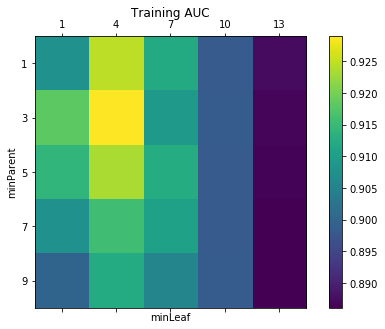

In [99]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))

cax1 = ax.matshow(trauc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+[1,4,7,10,13,16])
ax.set_yticklabels(['']+[1,3,5,7,9,11])
ax.set_xlabel("minLeaf")
ax.set_ylabel("minParent")
ax.set_title("Training AUC")
plt.show()

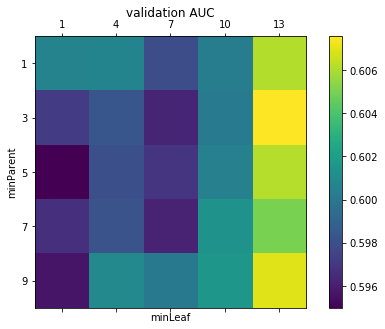

In [100]:
f1, ax = plt.subplots(1, 1, figsize=(8, 5))

cax1 = ax.matshow(vaauc, interpolation='nearest')
f1.colorbar(cax1)
ax.set_xticklabels(['']+[1,4,7,10,13,16])
ax.set_yticklabels(['']+[1,3,5,7,9,11])
ax.set_xlabel("minLeaf")
ax.set_ylabel("minParent")
ax.set_title("validation AUC")

plt.show()

i recommand minParent = 5, minLeaf = 13

## 5 Neural Networks

### 1.

In [107]:
layers = range(1,5,1) 
nodes = range(2,6,1) 

tr_auc = np.zeros((len(layers),len(nodes)))
va_auc = np.zeros((len(layers),len(nodes)))


for i, layer in enumerate(layers):
    for j, node in enumerate(nodes):
        nn = ml.nnet.nnetClassify()
        nn.init_weights([XtS.shape[1], layer*node, 2], 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt) 
        va_auc[i][j] = nn.auc(XvS, Yva)
        

it 1 : Jsur = 0.4206287417181429, J01 = 0.3094
it 2 : Jsur = 0.4201908494317259, J01 = 0.3102
it 4 : Jsur = 0.41715234031636644, J01 = 0.3076
it 8 : Jsur = 0.41566697896291316, J01 = 0.3092
it 16 : Jsur = 0.4152070390281243, J01 = 0.3086
it 32 : Jsur = 0.4151509806263817, J01 = 0.308
it 64 : Jsur = 0.41528580543772775, J01 = 0.31
it 128 : Jsur = 0.41547352624146117, J01 = 0.31
it 256 : Jsur = 0.4156596823930309, J01 = 0.3102
it 1 : Jsur = 0.4199867050815302, J01 = 0.3108
it 2 : Jsur = 0.4192625312945869, J01 = 0.3096
it 4 : Jsur = 0.4169179874873444, J01 = 0.31
it 8 : Jsur = 0.4144669853705504, J01 = 0.31
it 16 : Jsur = 0.4127614656010617, J01 = 0.3086
it 32 : Jsur = 0.4115712849271547, J01 = 0.3106
it 64 : Jsur = 0.4109477795971356, J01 = 0.3086
it 128 : Jsur = 0.41060932433275005, J01 = 0.3092
it 256 : Jsur = 0.4103877186614216, J01 = 0.3088
it 1 : Jsur = 0.41915265349296205, J01 = 0.3098
it 2 : Jsur = 0.4179133389960628, J01 = 0.308
it 4 : Jsur = 0.41605882246585263, J01 = 0.3096
it

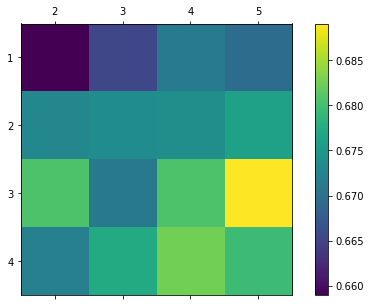

In [109]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax1 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+[2,3,4,5,6])
ax.set_yticklabels(['']+[1,2,3,4,5])

plt.show()

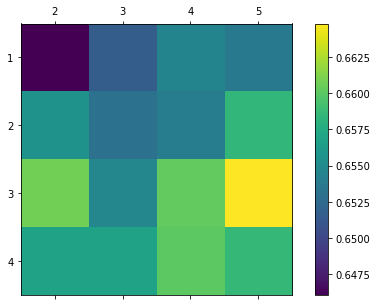

In [110]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax1 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+[2,3,4,5,6])
ax.set_yticklabels(['']+[1,2,3,4,5])

plt.show()

I recommand layer = 1, node = 2.

### 2.

In [116]:
def sig(z): return np.atleast_2d(z)
def dsig(z): return np.atleast_2d(1)
nn.setActivation('custom', sig, dsig)
nn.init_weights([XtS.shape[1], 2*1, 2], 'random', XtS, Yt)
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
traucs= nn.auc(XtS, Yt) 
vaaucs = nn.auc(XvS, Yva)
print('Train AUC',traucs)
print('Validation AUC', vaaucs)


it 1 : Jsur = 0.42119077004757094, J01 = 0.3112
it 2 : Jsur = 0.4187481012456978, J01 = 0.3114
it 4 : Jsur = 0.41743547445710266, J01 = 0.3094
it 8 : Jsur = 0.4165811558716916, J01 = 0.3124
it 16 : Jsur = 0.4159777572545504, J01 = 0.3122
it 32 : Jsur = 0.41563688231620416, J01 = 0.3122
it 64 : Jsur = 0.41541869852189556, J01 = 0.3112
it 128 : Jsur = 0.4153642149154838, J01 = 0.3102
Train AUC 0.6584058646289566
Validation AUC 0.6490642681323356


In [117]:
nn.init_weights([XtS.shape[1], 2*1, 2], 'random', XtS, Yt)
nn.setActivation('logistic', sig, dsig)
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
traucs= nn.auc(XtS, Yt) 
vaaucs = nn.auc(XvS, Yva)
print('Train AUC',traucs)
print('Validation AUC', vaaucs)

it 1 : Jsur = 0.4262855365950545, J01 = 0.343
it 2 : Jsur = 0.42642146181245844, J01 = 0.343
it 4 : Jsur = 0.42553095507036304, J01 = 0.343
it 8 : Jsur = 0.4250461633189008, J01 = 0.343
it 16 : Jsur = 0.4251905308881898, J01 = 0.343
it 32 : Jsur = 0.4255639289332379, J01 = 0.343
it 64 : Jsur = 0.4259906669290551, J01 = 0.343
it 128 : Jsur = 0.42640104626319936, J01 = 0.343
it 256 : Jsur = 0.42676848197349126, J01 = 0.343
Train AUC 0.6542168439456669
Validation AUC 0.6454596140822811


In [118]:
nn.init_weights([XtS.shape[1], 2*1, 2], 'random', XtS, Yt)
nn.setActivation('htangent', sig, dsig)
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
traucs= nn.auc(XtS, Yt) 
vaaucs = nn.auc(XvS, Yva)
print('Train AUC',traucs)
print('Validation AUC', vaaucs)

it 1 : Jsur = 0.42065750038222866, J01 = 0.3096
it 2 : Jsur = 0.4199977746743363, J01 = 0.3092
it 4 : Jsur = 0.416914626359005, J01 = 0.3062
it 8 : Jsur = 0.41548545499875417, J01 = 0.3088
it 16 : Jsur = 0.41510668496948583, J01 = 0.309
it 32 : Jsur = 0.41508976255825225, J01 = 0.3082
it 64 : Jsur = 0.41524528791233234, J01 = 0.3092
it 128 : Jsur = 0.41544744699778985, J01 = 0.3096
it 256 : Jsur = 0.4156432240963823, J01 = 0.3098
Train AUC 0.6590020900728197
Validation AUC 0.6461528762590945


## 6 Conclusions

## 7 Statement of Collaboration

I obey all the rules of UCI academic integrity and finish the project only by my own.
Ziyang Zhang 19/11/2018